<a href="https://colab.research.google.com/github/galibmulani/Newrepo/blob/main/transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:46<00:00, 25.8MB/s]
100% 1.06G/1.06G [00:46<00:00, 24.6MB/s]


In [3]:
import zipfile

zip=zipfile.ZipFile("/content/dogs-vs-cats.zip","r")
zip.extractall("/content")
zip.close()

In [4]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16

In [5]:
model16=VGG16(
    include_top=False,
    input_shape=(150,150,3),
    weights="imagenet"
)

58889256/58889256 [==============================] - 3s 0us/step


In [6]:
model16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [7]:
from keras.layers import Dense,Flatten
model=Sequential()

model.add(model16)
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
from keras.applications.vgg16 import preprocess_input,decode_predictions

model.trainable=False

In [10]:
train_ds=keras.utils.image_dataset_from_directory(
    directory="/content/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(150,150),
)

test_ds=keras.utils.image_dataset_from_directory(
    directory="/content/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(150,150),
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [11]:
def preprocess(image,label):
  image=tensorflow.cast(image/255,tensorflow.float32)
  return image,label

train_ds=train_ds.map(preprocess)
test_ds=test_ds.map(preprocess)


In [12]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [13]:
history=model.fit(train_ds,epochs=5,validation_data=test_ds)

Epoch 1/5
625/625 [==============================] - 76s 103ms/step - loss: 0.7695 - accuracy: 0.4827 - val_loss: 0.7726 - val_accuracy: 0.4842
Epoch 2/5
625/625 [==============================] - 67s 107ms/step - loss: 0.7695 - accuracy: 0.4827 - val_loss: 0.7726 - val_accuracy: 0.4842
Epoch 3/5
625/625 [==============================] - 56s 90ms/step - loss: 0.7695 - accuracy: 0.4827 - val_loss: 0.7726 - val_accuracy: 0.4842
Epoch 4/5
625/625 [==============================] - 56s 89ms/step - loss: 0.7695 - accuracy: 0.4827 - val_loss: 0.7726 - val_accuracy: 0.4842
Epoch 5/5
625/625 [==============================] - 66s 106ms/step - loss: 0.7695 - accuracy: 0.4827 - val_loss: 0.7726 - val_accuracy: 0.4842


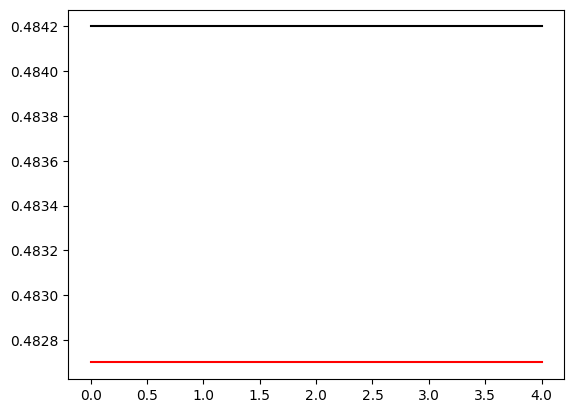

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"],color="red",label="accuracy")
plt.plot(history.history["val_accuracy"],color="black",label="val_accur")
plt.show()